<a href="https://colab.research.google.com/github/Prathamesh2226/Face-mask-detection-using-CNN/blob/main/_face_mask_detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
print(tf.__version__)
!pip install --upgrade tensorflow

2.17.0


In [ ]:
# Instead of importing from keras.preprocessing.image, import from tensorflow.keras.preprocessing.image:
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory # Recommended way for new code as per TensorFlow documentation
# or
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Use this if you need ImageDataGenerator

# Rest of your code remains the same...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, classification_report
import cv2
import seaborn as sns

In [ ]:
input_data_path = '/content/drive/MyDrive/mass_cnn/archive (38)/images'
annotations_path = "/content/drive/MyDrive/mass_cnn/archive (38)/annotations"
images = [*os.listdir("/content/drive/MyDrive/mass_cnn/archive (38)/images")]
output_data_path =  '.'

In [ ]:
pip install tensorflow opencv-python numpy matplotlib


In [ ]:
def parse_annotation(path):
    tree = ET.parse(path)
    root = tree.getroot()
    constants = {}
    objects = [child for child in root if child.tag == 'object']
    for element in tree.iter():
        if element.tag == 'filename':
            constants['file'] = element.text[0:-4]
        if element.tag == 'size':
            for dim in list(element):
                if dim.tag == 'width':
                    constants['width'] = int(dim.text)
                if dim.tag == 'height':
                    constants['height'] = int(dim.text)
    object_params = [parse_annotation_object(obj) for obj in objects]
    return [{'filename': constants['file'], **obj} for obj in object_params]

def parse_annotation_object(annotation_object):
    params = {}
    for param in list(annotation_object):
        if param.tag == 'name':
            params['name'] = param.text
        if param.tag == 'bndbox':
            for coord in list(param):
                if coord.tag == 'xmin':
                    params['xmin'] = int(coord.text)
                if coord.tag == 'ymin':
                    params['ymin'] = int(coord.text)
                if coord.tag == 'xmax':
                    params['xmax'] = int(coord.text)
                if coord.tag == 'ymax':
                    params['ymax'] = int(coord.text)
    return params

# Load all annotations
def load_annotations(annotations_path):
    annotations = []
    for xml_file in os.listdir(annotations_path):
        if xml_file.endswith('.xml'):
            annotations.extend(parse_annotation(os.path.join(annotations_path, xml_file)))
    return annotations


Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 23s 195ms/step - accuracy: 0.7183 - loss: 13.8884 - val_accuracy: 0.7872 - val_loss: 0.5623
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.7980 - loss: 0.5624 - val_accuracy: 0.7872 - val_loss: 0.5417
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - accuracy: 0.8129 - loss: 0.5107 - val_accuracy: 0.7872 - val_loss: 0.5207
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - accuracy: 0.7814 - loss: 0.5287 - val_accuracy: 0.7872 - val_loss: 0.5171
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 21s 161ms/step - accuracy: 0.7875 - loss: 0.5204 - val_accuracy: 0.7872 - val_loss: 0.5186
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.8038 - loss: 0.4994 - val_accuracy: 0.7872 - val_loss: 0.5154
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - accuracy: 0.8016 - loss: 0.5032 - val_accuracy: 0.7872 - val_loss: 0.5169
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - accuracy: 0.7949 - loss: 0.5070 - val_acc

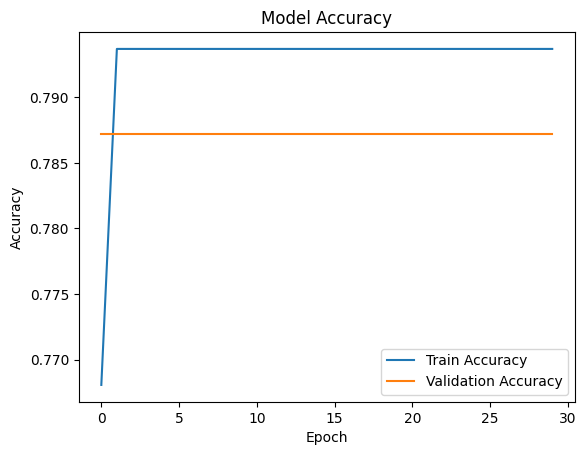

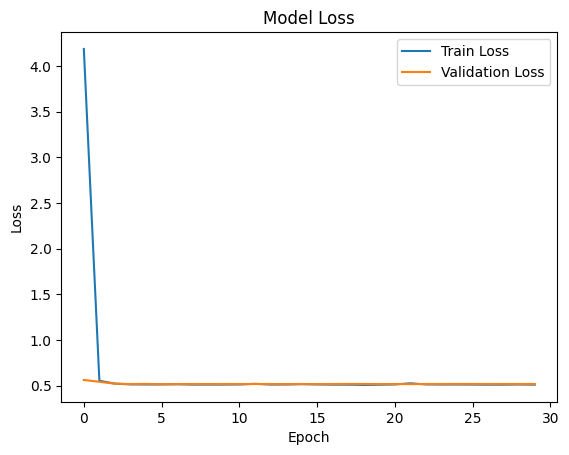

In [ ]:
import os
import numpy as np
import cv2
import xml.etree.ElementTree as ET
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#from keras.preprocessing.image import ImageDataGenerator # Commented out to avoid error
from keras.models import load_model
import matplotlib.pyplot as plt
def parse_annotation(path):
    tree = ET.parse(path)
    root = tree.getroot()
    constants = {}
    objects = [child for child in root if child.tag == 'object']
    for element in tree.iter():
        if element.tag == 'filename':
            constants['file'] = element.text[0:-4]
        if element.tag == 'size':
            for dim in list(element):
                if dim.tag == 'width':
                    constants['width'] = int(dim.text)
                if dim.tag == 'height':
                    constants['height'] = int(dim.text)
    object_params = [parse_annotation_object(obj) for obj in objects]
    return [{'filename': constants['file'], **obj} for obj in object_params]

def parse_annotation_object(annotation_object):
    params = {}
    for param in list(annotation_object):
        if param.tag == 'name':
            params['name'] = param.text
        if param.tag == 'bndbox':
            for coord in list(param):
                if coord.tag == 'xmin':
                    params['xmin'] = int(coord.text)
                if coord.tag == 'ymin':
                    params['ymin'] = int(coord.text)
                if coord.tag == 'xmax':
                    params['xmax'] = int(coord.text)
                if coord.tag == 'ymax':
                    params['ymax'] = int(coord.text)
    return params

def load_annotations(annotations_path):
    annotations = []
    for xml_file in os.listdir(annotations_path):
        if xml_file.endswith('.xml'):
            annotations.extend(parse_annotation(os.path.join(annotations_path, xml_file)))
    return annotations

def load_images_and_labels(images_path, annotations):
    images = []
    labels = []
    for ann in annotations:
        img_path = os.path.join(images_path, f"{ann['filename']}.png")  # Assuming images are in .png format
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (128, 128))  # Resize image
                images.append(img)
                labels.append(1 if ann['name'] == 'with_mask' else 0)  # Assuming 'with_mask' and 'without_mask'
    return np.array(images), np.array(labels)

def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    return model

# Load your dataset
images_path = '/content/drive/MyDrive/mass_cnn/archive (38)/images'  # Change this to your images directory
annotations_path = '/content/drive/MyDrive/mass_cnn/archive (38)/annotations'  # Change this to your annotations directory

# Load annotations and images
annotations = load_annotations(annotations_path)
X, y = load_images_and_labels(images_path, annotations)

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create and compile the model
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True)

train_generator = datagen.flow(X_train, y_train, batch_size=32)
val_generator = datagen.flow(X_val, y_val, batch_size=32)

# Train the model
model_history = model.fit(train_generator, validation_data=val_generator, epochs=30)

# Save the model
model.save('face_mask_detection_model.h5')

# Plotting the training history
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(model_history.history['loss'], label='Train Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
def predict_mask(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))  # Resize to match model input
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img)
    return "with_mask" if prediction[0][0] > 0.5 else "without_mask"

# Example usage
image_path = '/content/maksssksksss95.png'  # Change this to your test image path
result = predict_mask(image_path)
print(f'The uploaded image is: {result}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The uploaded image is: with_mask


Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 23s 202ms/step - accuracy: 0.7350 - loss: 17.6361 - val_accuracy: 0.7872 - val_loss: 0.6007
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.8003 - loss: 0.5466 - val_accuracy: 0.7872 - val_loss: 0.5325
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - accuracy: 0.8004 - loss: 0.5422 - val_accuracy: 0.7872 - val_loss: 0.5338
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.7822 - loss: 0.5387 - val_accuracy: 0.7872 - val_loss: 0.5694
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.8004 - loss: 0.5332 - val_accuracy: 0.7872 - val_loss: 0.5232
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 156ms/step - accuracy: 0.7915 - loss: 0.5461 - val_accuracy: 0.7872 - val_loss: 0.5235
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 176ms/step - accuracy: 0.7890 - loss: 0.5314 - val_accuracy: 0.7872 - val_loss: 0.5244
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.7939 - loss: 0.5325 - val_acc

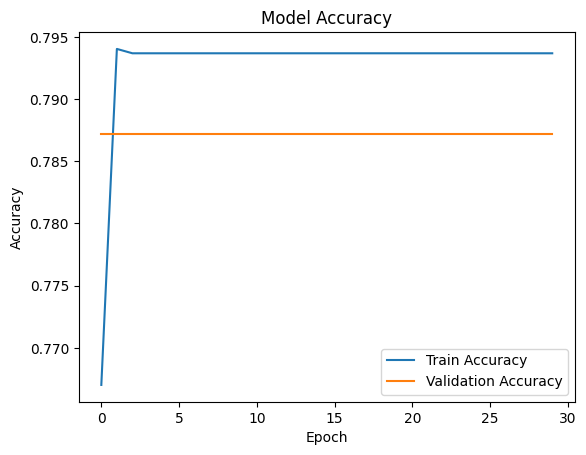

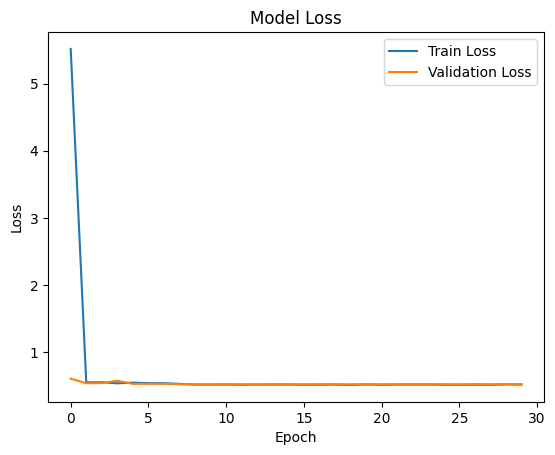

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
The uploaded image is: with_mask


In [ ]:

images_path = '/content/drive/MyDrive/mass_cnn/archive (38)/images'  # Change this to your images directory
annotations_path = '/content/drive/MyDrive/mass_cnn/archive (38)/annotations'  # Change this to your annotations directory

# Load annotations and images
annotations = load_annotations(annotations_path)
X, y = load_images_and_labels(images_path, annotations)

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create and compile the model
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True)

train_generator = datagen.flow(X_train, y_train, batch_size=32)
val_generator = datagen.flow(X_val, y_val, batch_size=32)

# Train the model
model_history = model.fit(train_generator, validation_data=val_generator, epochs=30)

# Save the model
model.save('face_mask_detection_model.h5')

# Plotting the training history
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(model_history.history['loss'], label='Train Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

